In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from glob import glob
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall 

import os
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

import tensorflow as tf

In [17]:

path = r"C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)
data = []
levels = ['NORMAL', 'COVID']
sublevels= ['images', 'masks']
for id, level in enumerate(levels):
    for id, sublevel in enumerate(sublevels):
        for file in os.listdir(os.path.join(data_dir, level, sublevel)):
            data.append(['{}/{}'.format(level, file), level]) 


data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' + data['image_file']
data['corona_result'] = data['corona_result'].map({'NORMAL': 'Negative', 'COVID': 'Positive'})
samples = 13808

data

,image_file,corona_result,path
0,NORMAL/Normal-1.png,Negative,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
1,NORMAL/Normal-10.png,Negative,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
2,NORMAL/Normal-100.png,Negative,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
3,NORMAL/Normal-1000.png,Negative,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
4,NORMAL/Normal-10000.png,Negative,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
...,...,...,...
27611,COVID/COVID-995.png,Positive,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
27612,COVID/COVID-996.png,Positive,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
27613,COVID/COVID-997.png,Positive,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...
27614,COVID/COVID-998.png,Positive,C:\Users\Ethan\LUNG DISEASE CAPSTONE\COVID-19_...


Text(0, 0.5, 'Count')

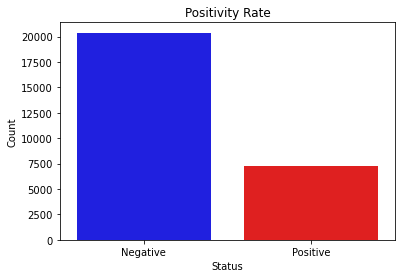

In [19]:
sns.countplot(data=data,x='corona_result' , palette=['blue','red']);
plt.title('Positivity Rate')
plt.xlabel('Status')
plt.ylabel('Count')